# Quantitative Intertextuality

**Qunatitative Intertextuality** is the name that **[Walter Scheirer](https://www.wjscheirer.com/)** and I gave to a worldview that joins methods of computational analysis for humanities data with a philosophy that explains why such methods are relevant to the study of the humanties and also to a set of values that prioritize the human experience, both in building computational models and in drawing meaning from their results.

## A broad view of intertextuality

In my field, classical philology, **intertext** is often used as a synonym for **literary allusion**. Intertexts (plural) are literary figures like similes, discrete objects that can be picked out from a text and tallied up. Their primary attribute is the **source**, that is, a specific passage in an earlier text to which they point. Sometimes they are assigned interpretive meaning—the most attention is given to those that seem to have an adversarial relationship with the source—but more often they’re simply signaled in a commentary with the abbreviation *cf* and a reference to the source.

**Julia Kristeva**, who coined the term *intertextuality* in the 1960s, originally had a much broader idea of what it entailed. In Kristeva’s vision, all texts—indeed, all meaning-bearing systems of signs, were interrelated and understandable only in reference to each other:

<blockquote>
    <p>[L]iterary structure does not simply exist but is generated in relation to another structure. What allows a dynamic dimension to structuralism is [Mikhail Bakhtin’s] conception of the “literary word” as an intersection of textual surfaces rather than a point (a fixed meaning), as a dialogue among several writings.</p>
    <footer class="blockquote-footer">Julia Kristeva, “Word, Dialogue, and Novel,” collected in <i>The Kristeva Reader</i>, ed. Toril Moi</footer>
</blockquote>

This original view of intertext, as a field of invisible tensions connecting what is uttered to the field of things that were not uttered but could have been, the remembered corpus of things that have been uttered before, is one that underpins Quantitative Intertextuality as well.

## Pattern recognition as a human experience

<div style="float:right; margin:1em">
    <img style="width:350px" src="img/Breakfastclub.png">
    <p style="text-align:right">source: fandom.com</p>
</div>

We contend that learning sign systems is essentially a process of recognizing patterns and building models. These are things we often do with machines, but more importantly they are fundamentally human tasks.

How do we know what "sounds right" in our own language? What arouses our intuition that a student’s essay is suddenly being written by someone else? That a cello suite by Benjamin Britten is engaging in complex ways with a predecessor by Bach? Or that a twenty-first century children’s sitcom is [silently parodying a 1980s cult classic](https://victorious.fandom.com/wiki/The_Breakfast_Bunch) that none of the show’s intended audience are old enough to have seen?

We know these things because at every encounter with language and other sign systems, our ability to understand what is being conveyed rests upon an internal model of the relationships between the signs. We are always, mostly subconsciously, doing pattern recognition in our heads. The experience of recognition rests upon those models, even if we’re largely unaware of them: the model and the experience are two sides of the same coin.

## Putting humans first

Why does it matter that human as well as machines engage in pattern-recognition? For two reasons:

- Because human experience is what we study
- Because machines get it wrong sometimes

<div style="float:right; margin:1em; width:400px">
    <img style="width:100%" src="img/adversarial.png">
    <p style="text-align:right">Source: Erica Klarreich (2016) <a href="https://cacm.acm.org/magazines/2016/11/209133-learning-securely/fulltext">"Learning Securely."</a>
Communications of the ACM 59(11):12-14 10.1145/2994577</p>
</div>

As a humanist, I’m primarily interested in what it feels like to create and to experience literature. To the degree that computational methods can aid that, they are useful to me. It may be tempting to treat the machine as a black box, one that simply gives me the answer I'm looking for. But that misses an opportunity to learn something about the experience of literature by studying *how* the machine knows what it knows, and what that says about how people know what we know.

Equally importantly, if we treat the machine as a black box, we can be caught off guard when it occasionally fails—spectacularly—to do what we expect. When adversarial images are able to fool advanced computer vision models, they reveal that the computational model has given too much significance to features that humans don’t notice. Studying how humans recognize objects can [lead to improved performance by the machine](https://arxiv.org/abs/1904.03734).

## Computational analysis for intertextual media

The goal of this workshop is to survey some common tasks in textual analysis using R, while highlighting the role that intertext plays in structuring the objects of our study and the ways in which we interpret them. One of the tricky/annoying aspects will be that some very powerful tools, like authorship attribution with [stylo](https://cran.r-project.org/web/packages/stylo/index.html), for example, are pretty easy to use out of the box, while some of the rudimentary tasks, like cleaning up a textual corpus that someone else has prepared for other purposes and making sure all the files use the naming convention stylo expects, can take a lot of trial and error.

### Generalized workflow

These are the tasks I find myself doing most frequently in computational humanities projects:

- downloading text from online repositories, or, worse, scraping websites
- cleaning and saving local copies of the data
- feature selection and extraction - turning a document into tokens
- dimensionality reduction and other transformations
- classification or other pattern-recognition tasks
- graphical representation of results

Often the first two items on that list, acquiring and cleaning up the texts to build a corpus, take the majority of the time.

The middle part—extracting features, performing transformations, and classifying—is often done several times with slightly different parameters, to see what works best. (Usually there's a verification stage in between.) This stage can be automated, so it doesn’t actually take that much of my time, despite being the complicated part of the work.

The final step, graphing, is often really time-consuming. I find myself spending hours going back and forth to online galleries or tutorials, tweaking plots for an article or a slide.

### Skills to practice

If you have limited time to invest in learning computational skills, I strongly recommend building familiarity with the basics:

- web scraping
- importing and manipulating tabular data
- navigating **xml** with xpath or css selectors
- building **regular expressions**
- plotting

💁🏻‍♂️ You don’t have to be an expert at any of these things. You just need to be able to recognize where they’re likely to be useful, know where to look for solutions when you run into trouble, and have enough experience to be able to understand and implement the answers you find online.

**These are the skills that will save you time.** They’re not as sexy as some of the fancier analytical tools. But at the end of the day, the analytical tools (a) have a manual, and (b) only work if you can get your text into them.

# From text to words

The first part of our analytical workflow is getting texts—usually from the Internet, but sometimes texts that we‘ve prepared locally—into R and breaking them into words.

Let’s start with the task of retrieving texts. R makes reading a file from a remote server as simple as reading from the local filesystem. If you pass a filename that starts with a protocol like `https://`, the request will be handled transparently for you. 

In addition to the tidyverse packages we used last session, I’m also going to use a package called tidytext. If you don’t have it already, you’ll have to install it.

In [1]:
# only necessary once
install.packages('tidytext')


The downloaded binary packages are in
	/var/folders/_k/nhmmjzg96r318bm9jvyvv7ph0000gn/T//RtmpIuQpMD/downloaded_packages


In [2]:
library(tidyverse)
library(tidytext)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



For example, let’s consider this text of Tennyson’s collection of Arthurian poems, **Idyls of the King**. It’s available on Project Gutenberg [here](https://www.gutenberg.org/ebooks/610). I’m going to select the URL that points to the plain text version. (If you copy-paste the URL into your browser, you can see what the file is supposed to look like.)

In [3]:
url <- 'https://www.gutenberg.org/files/610/610-0.txt'
king_raw<- read_file(url)

Did we get it?

In [4]:
str(king_raw)

 chr "The Project Gutenberg eBook of Idylls of the King, by Alfred, Lord Tennyson\r\n\r\nThis eBook is for the use of"| __truncated__


In [5]:
nchar(king_raw)

[1] 507556

**🤔 Great! Now what?**

The ways in which we prepare this text for further processing depend a lot on our goals. In particular, we have to ask ourselves what aspects of the text’s structure are significant to us.

- For some **authorship attribution**, we would be happy to treat the entire book as a single **bag of words**, and we don’t need to worry much about finer-grained details.
- For **allusion detection**, on the other hand, we want super-fine precision: at least an identifier for each individual poem and then each line within the poem.
- For things like **sentiment analysis** or **topic modelling**, we might be interested in intermediate-sized chunks.

We also have to concern ourselves with **metadata**. How much information about the text do we want to store? Where can we find that information within the text, and how to we separate it from the text itself.

### Inspection

This stage requires a lot of trial and error, and a lot of manual inspection. I would be strongly tempted to write the file locally and then use a text editor to open it up and look inside. Alternatively, I could just use my browser to examine the online version.

In [6]:
write_file(king_raw, 'king.txt')

Before going on, spend some time looking at the file. 

- What do you notice about the text? 
- How is structure signified, and what structures are we interested in?
- Can we formalize the "rules" that will allow us to break up the file into individual poems and lines?

<div style="height:15em">
</div>
<div>
    <p style="font-size:26pt; text-align:center">❧ ❧ ❧</p>
</div>
<div style="height:15em">
</div>


### Divide into lines as a first step?

One question that we face right from the beginning is whether to break this file into lines, or treat it as a single string of text. What are the pros and cons?

#### In favour of breaking into lines

- lines are already a meaningful unit of division in the text
- breaking on lines would produce a vector, and R is good with vectors

#### Against

- It looks like the division between poems is signalled in part by line breaks, so we’d have to search for patterns across multiple elements within the resulting vector to find poem divisions
- Some verse lines are themselves broken across paragraphs, so we might find ourselves having to paste them together later.

Let’s live dangerously and break the poem into lines. I’m actually going to re-do the download with a slightly different function:

In [7]:
king_lines <- read_lines(url)

In [8]:
length(king_lines)

[1] 11581

### Trimming header and footer

First step: locate the line that signals the end of the header, and drop everything before that. The package **stringr**, loaded automatically with tidyverse, or on its own if you prefer, provides a suite of text search (and replace) functions that work well with pipes. These are useful, and worth practicing.

They all start with `str_`. Try typing just that much at the console and exploring the options that R Studio offers.

Remember, we’re searching a character **vector**, where each element is a line, and we want to know the position in that vector of the first match.

In [9]:
pattern <- '*** START OF THE PROJECT GUTENBERG EBOOK IDYLLS OF THE KING ***'

str_detect(king_lines, fixed(pattern))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

`str_detect()` returns true wherever the line contains the pattern we specify. In this case, it should only happen once.

In [10]:
king_lines %>%
    str_detect(fixed(pattern)) %>%
    which()

[1] 24

**Note**: the reason we have to wrap our pattern in `fixed()` is because, by default, `str_*` functions work on [**regular expressions**](https://en.wikipedia.org/wiki/Regular_expression). Regular expressions are search patters that use a specialized syntax to allow lots of complicated wildcards, alternatives, and shortcuts. They can look totally inscrutable, but they are **really, really useful**. The great thing about regexes is that you don’t have to master them: you can build up the regex you need for a given task by trial and error.

We’ll look at some regex basics very soon. But for now, we have to turn *off* regex evaluation because the asterisks in our pattern would have a wildcard meaning otherwise. Hence the `fixed()`.

We can use the same method to find the first line of the footer, and then we’ll just jettison the header and footer and keep only the lines between them.

In [11]:
# banners marking the start and end of the text proper
head_pattern <- '*** START OF THE PROJECT GUTENBERG EBOOK IDYLLS OF THE KING ***'
foot_pattern <- '*** END OF THE PROJECT GUTENBERG EBOOK IDYLLS OF THE KING ***'

# locate their line positions
head_last_line <- king_lines %>%
    str_detect(fixed(head_pattern)) %>%
    which()

foot_first_line <- king_lines %>% 
    str_detect(fixed(foot_pattern)) %>%
    which()

# subset the lines
king_lines <- king_lines[(head_last_line+1):(foot_first_line-1)]

Did it work?

In [12]:
head(king_lines)

[1] ""                         ""                        
[3] ""                         ""                        
[5] "      Idylls of the King" ""

In [13]:
tail(king_lines)

[1] "  The darkness of that battle in the West,"
[2] "  Where all of high and holy dies away."   
[3] ""                                          
[4] ""                                          
[5] ""                                          
[6] ""

### Internal structure

What about the internal structure of the text? We already have verse lines (except for lines broken across paragraphs). But what about the division into poems? And what will we do with paratext like the table of contents, title page, etc?


### Poem boundaries

The poem boundaries are frustratingly "intuitive". Each seems to start with a series of empty lines. Each poem title is set in from the left margin by a certain amount. What would be really helpful would be if the specific number of spaces characters used to indent the titles was unique to that function.

I’m going to try another stringr function, `str_starts()`, which only matches at the beginning of the string. I’ll copy-paste the spaces from the first poem title, "Dedication", and see what I get...

In [14]:
king_lines %>% 
    str_starts('      ') %>%
    which()

[1]     5     7     9    11    34    43    89    99   169   665   729   794
 [13]   825   893   969   976   994  1046  1154  1163  1262  1280  1288  1294
 [25]  1330  1439  1458  1477  1490  1515  1574  1591  1635  1708  1719  1751
 [37]  1783  1883  1889  1936  1967  1997  2045  2105  2126  2144  2236  3132
 [49]  3726  4169  4180  4187  4399  4571  4656  4744  4780  4834  4844  4914
 [61]  4939  5889  6044  6226  6507  6526  6623  6895  6908  7187  7241  7268
 [73]  7274  7401  8009  8080  8095  8328  8388  8452  8462  8499  8522  8529
 [85]  8642  8798  8920  8978  9055  9603  9656  9667  9822  9881  9939 10034
 [97] 10284 10492 10526 10577 10620 11137

Hmm.... that’s too many results to correspond only to poem titles. But wait! It's not just matching lines indented by *six* spaces, it’s also matching lines indented by *more than six*, since they, too, start with six spaces.

To capture lines indented by six *and only six* spaces, I need to specify that the next character *must not* be a space.

For that, I can use one of the regex codes, `\w`. Regular expressions use backslash codes to represent special characters that are hard to type, like `\t`, "tab", `\n`, "newline", or `\b`, "word boundary". They also use backslash codes for *classes* of characters, like `\d`, "digit", `\w` "word", `\s`, space. The `\w` code will match on any character that could be part of a word, including all the upper- and lower-case letters.

⚠️ **Note**: Because of an unfortunate overlap in the syntax of regexes and R strings, you actually have to double all your backslashes inside quotation marks in R. One is for the regex, the other is for R. It's annoying.

Let's refine our pattern and try again:

In [15]:
king_lines %>% 
    str_starts('      \\w') %>%
    which()

[1]     5     7     9    11    34    99   665  2236  3132  4169  4844  5889
[13]  7401  8388  9055  9881 10620 11137

This looks promising: what are those lines?

In [16]:
is_break <- str_starts(king_lines, '      \\w')

king_lines[is_break]

[1] "      Idylls of the King"                      
 [2] "      _Flos Regum Arthurus_ (Joseph of Exeter)"
 [3] "      In Twelve Books"                         
 [4] "      By Alfred, Lord Tennyson"                
 [5] "      Dedication"                              
 [6] "      The Coming of Arthur"                    
 [7] "      Gareth and Lynette"                      
 [8] "      The Marriage of Geraint"                 
 [9] "      Geraint and Enid"                        
[10] "      Balin and Balan"                         
[11] "      Merlin and Vivien"                       
[12] "      Lancelot and Elaine"                     
[13] "      The Holy Grail"                          
[14] "      Pelleas and Ettarre"                     
[15] "      The Last Tournament"                     
[16] "      Guinevere"                               
[17] "      The Passing of Arthur"                   
[18] "      To the Queen"

We're almost there! The first couple are from the front matter, but from "Dedication" on, they're the poem titles.

Let's take stock: what we have right now is a vector, `is_break`, with the same length as `king_lines`, that is `TRUE` on the first line of each poem.

We can make use of the fact that R evaluates `TRUE` as `1` and `FALSE` as `0` in numberic contexts here. The **cumulative sum** function, `cumsum()`, will give us a running tally of the `TRUE`s in `is_break`. You can see it at work if we place them side by side:

In [17]:
tibble(
    is_break = is_break,    
    section = cumsum(is_break),
    text = king_lines
)

is_break,section,text
<lgl>,<int>,<chr>
FALSE,0,
FALSE,0,
FALSE,0,
FALSE,0,
TRUE,1,Idylls of the King
FALSE,1,
TRUE,2,_Flos Regum Arthurus_ (Joseph of Exeter)
FALSE,2,
TRUE,3,In Twelve Books


This is very close to what we want. Now that the poem titles have done their work, I think I want to prune them, along with all remaining blank lines. We can use `filter()` for this. 

To drop lines specified by `is_break`, which is a logical vector, I can negate it with `!` the logical "not" operator.

In [18]:
tibble( 
    section = cumsum(is_break),
    text = king_lines
) %>%
filter(!is_break) %>% 
filter(text != '')

section,text
<int>,<chr>
4,Contents
4,Dedication
4,The Coming of Arthur
4,Gareth and Lynette
4,The Marriage of Geraint
4,Geraint and Enid
4,Balin and Balan
4,Merlin and Vivien
4,Lancelot and Elaine


Okay, the only frontmatter that remains is the table of contents, currently labelled section `4`. Let's filter that out, too. While we're at it, we might as well renumber `section` so that it starts with 1.

In [19]:
king_cleaned <- tibble( 
    section = cumsum(is_break),
    text = king_lines
) %>%
    filter(!is_break) %>% 
    filter(text != '') %>%
    filter(section > 4) %>% 
    mutate(section = section -4 )

In [20]:
king_cleaned

section,text
<dbl>,<chr>
1,"These to His Memory—since he held them dear,"
1,Perchance as finding there unconsciously
1,"Some image of himself—I dedicate,"
1,"I dedicate, I consecrate with tears—"
1,These Idylls.
1,And indeed He seems to me
1,"Scarce other than my king’s ideal knight,"
1,“Who reverenced his conscience as his king;
1,"Whose glory was, redressing human wrong;"


The last task I want to try is numbering all the lines within each poem. For the present, I'm going to ignore the problem of verse lines split across a paragraph, because I think this example has taken enough of our time. But what clues do you think we could use to detect these lines, and what ought we to do with them?

To number the lines *per section*, I'm going to use `group_by()`, together with the helper function `row_number()` which will return the current row in a given group. After I'm done, I'll `ungroup()` the results.

The new column automatically gets created on the right; I'm going to `relocate()` it to a position just after `section`, just for my own preferences.

In [21]:
king_cleaned <- king_cleaned %>%
    group_by(section) %>% 
    mutate(line = row_number()) %>% 
    ungroup() %>%
    relocate(line, .after=section)

In [22]:
head(king_cleaned)

section,line,text
<dbl>,<int>,<chr>
1,1,"These to His Memory—since he held them dear,"
1,2,Perchance as finding there unconsciously
1,3,"Some image of himself—I dedicate,"
1,4,"I dedicate, I consecrate with tears—"
1,5,These Idylls.
1,6,And indeed He seems to me


Let's take a look at, say, the fifth poem:

In [23]:
king_cleaned %>% filter(section==5)

section,line,text
<dbl>,<int>,<chr>
5,1,"O purblind race of miserable men,"
5,2,How many among us at this very hour
5,3,"Do forge a life-long trouble for ourselves,"
5,4,"By taking true for false, or false for true;"
5,5,"Here, through the feeble twilight of this world"
5,6,"Groping, how many, until we pass and reach"
5,7,"That other, where we see as we are seen!"
5,8,"So fared it with Geraint, who issuing forth"
5,9,"That morning, when they both had got to horse,"


Just for fun, let’s visualize the varying lengths of the poems across the collection with **ggplot2**:

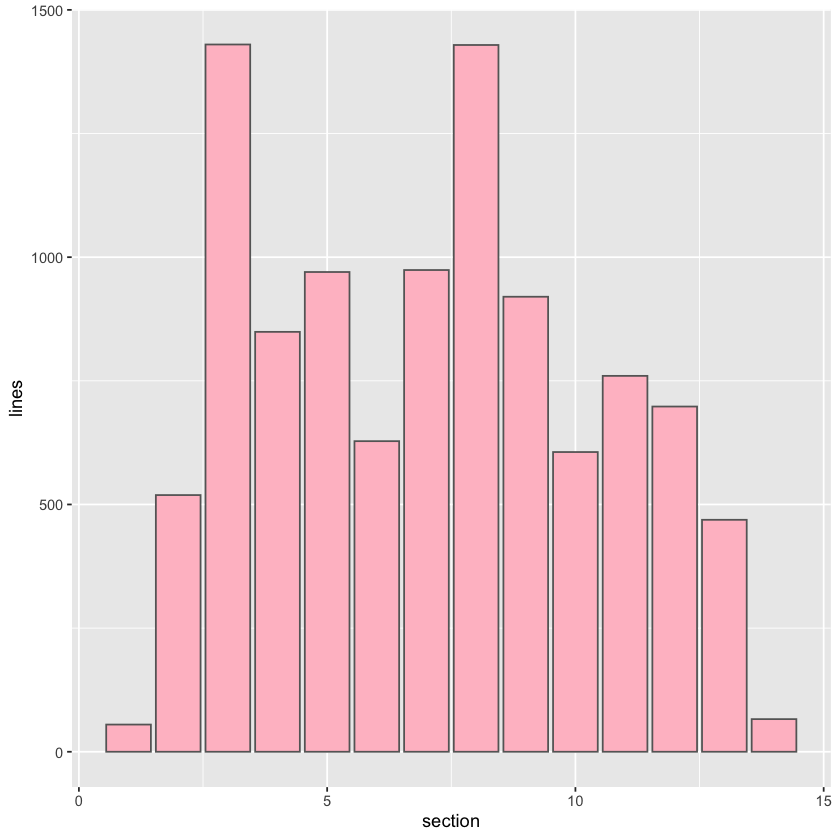

In [24]:
king_cleaned %>%
    group_by(section) %>%
    summarize(lines=n()) %>%
ggplot() +
    aes(x=section, y=lines) +
    geom_bar(stat = 'identity', color='grey40', fill='pink')

### 🤔 Experiment

If you have your own data, try reading it into a tablular format in R. What structures are important to you? How are they signalled in the document?

If you don’t have your own data, you can try parsing this text of Ovid's *Amores*, from [Tesserae](https://tesserae.caset.buffalo.edu/):
    
    https://raw.githubusercontent.com/tesserae/tesserae/master/texts/la/ovid.amores.tess